# Suma de variables uniformes

$Z = \sum_{i=1}^{n} X_i, \; X_i \sim \mathrm{U}(0,1)$ 

In [1]:
pip install boost-histogram

You should consider upgrading via the '/home/dravignani/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib notebook

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import boost_histogram as bh

Número de variables a sumar

In [4]:
numero_variables = 10

Número de simulaciones

In [5]:
numero_simulaciones = 10000

Generador de números aleatorios

In [6]:
rng = np.random.default_rng()

Histograma para guardar la suma de las variables uniformes

In [7]:
numero_bines = 51

In [8]:
maximo_x = numero_variables 

In [9]:
hist = bh.Histogram(bh.axis.Regular(bins=numero_bines, start=0, stop=maximo_x))

Genero los datos y lleno el histograma

In [10]:
for i in range(numero_simulaciones):
    #print("Iteración ", i)
    x = rng.random(numero_variables)     # distribución uniforme [0,1)
    #print("x = ", x)
    z = x.sum()
    #print("z = ", z)    
    hist.fill(z)

## Grafico los datos generados

<IPython.core.display.Javascript object>


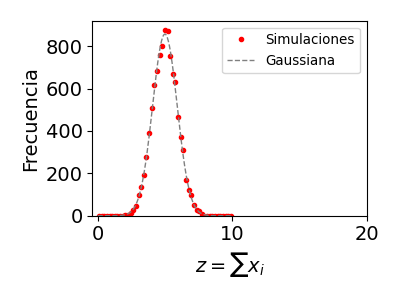

(-0.3921568627450981, 20.0)

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel('$z = \sum x_i$')
ax.set_ylabel('Frecuencia')
ax.plot(hist.axes.centers[0], hist.values(), 'ro', ms='3', label='Simulaciones')
ax.set_ylim(bottom=0)
ax.set_xlim(right=2*maximo_x)

## Distribución Gaussiana

In [12]:
mu = numero_variables / 2
print(mu)

5.0


In [13]:
sigma = math.sqrt(numero_variables/12)
print(sigma)

0.9128709291752769


In [14]:
x = np.linspace(0, maximo_x, 256)

Normalización de la distribución

In [15]:
k = numero_simulaciones * hist.axes.widths[0][0]
print(k)

1960.7843137254902


In [16]:
y = k * norm.pdf(x, loc=mu, scale=sigma)

In [17]:
ax.plot(x, y, ls='--', lw=1, color='gray', label='Gaussiana')
ax.legend()

In [18]:
plt.savefig('suma_uniformes.svg')